## Import

In [228]:
import os
import pickle
import matplotlib.pyplot as plt
import math
import numpy as np
import torch

## Define needed function

In [229]:
def read_pkl(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
        f.close()
    return obj

## Load and Define Needed Variables

In [235]:
ex = 'ex2_with'
root_dir = '/home/natcha/github/legged_project/logs/anymal_c_box/'
name_folder = [f+'/' for f in os.listdir(root_dir) if ex in f]
folder_dir = root_dir+name_folder[-1]

print(folder_dir)

/home/natcha/github/legged_project/logs/anymal_c_box/Dec14_22-01-36_ex2_with_curriculum/


In [236]:
reward_log_path = folder_dir+'training_log.pkl'
reward_log = read_pkl(reward_log_path)
iteration = reward_log['iteration'][-1]

In [ ]:
log_path = folder_dir+'state_log.pkl'
log = read_pkl(log_path)
dt = log['dt'][0]
num_samples = log['num_samples'][0]

## Analysis while training

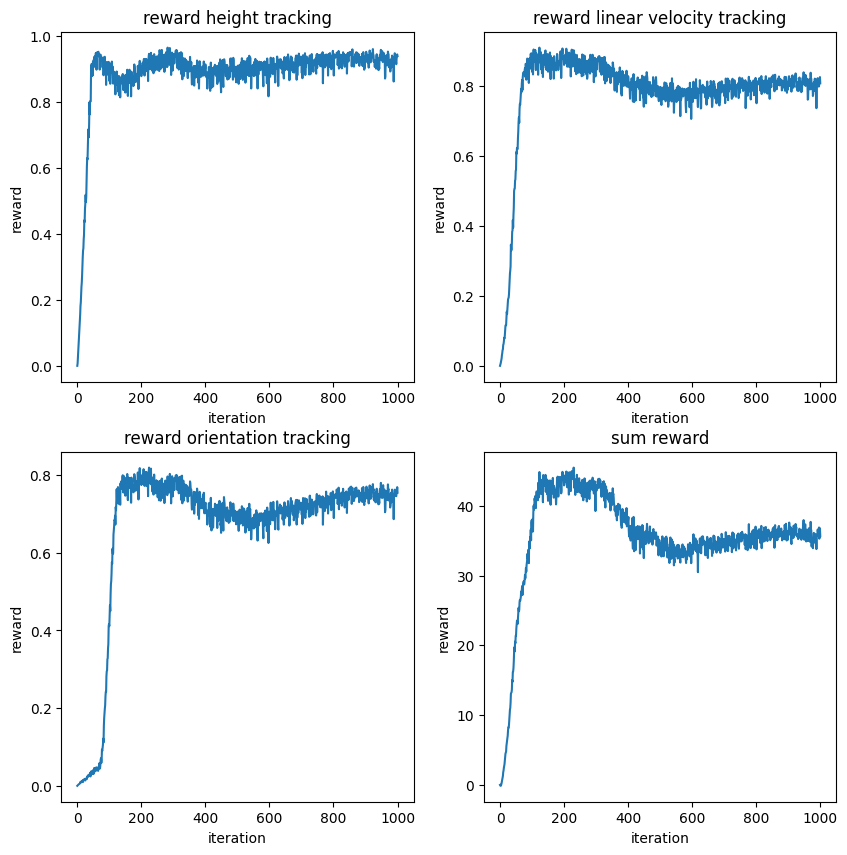

In [237]:
nb_rows = 2
nb_cols = 2
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10, 10))

ite = np.linspace(0, int(iteration), int(iteration+1))

a = axs[0, 0]
if reward_log['tracking_height']: a.plot(ite, reward_log['tracking_height'])
# if reward_log['sum_reward']: a.plot(ite, reward_log['sum_reward'])
a.set(xlabel='iteration', ylabel='reward', title='reward height tracking')

a = axs[0, 1]
if reward_log['tracking_lin_vel']: a.plot(ite, reward_log['tracking_lin_vel'])
a.set(xlabel='iteration', ylabel='reward', title='reward linear velocity tracking')

a = axs[1, 0]
if reward_log['tracking_orientation']: a.plot(ite, reward_log['tracking_orientation'])
a.set(xlabel='iteration', ylabel='reward', title='reward orientation tracking')

a = axs[1, 1]
if reward_log['sum_reward']: a.plot(ite, reward_log['sum_reward'])
a.set(xlabel='iteration', ylabel='reward', title='sum reward')

plt.show()

In [238]:
reward_log["command_level"]

[array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.43982297]),
 array([1.3       , 0.25      , 0.

## Analysis post-training 

### Commands Tracking

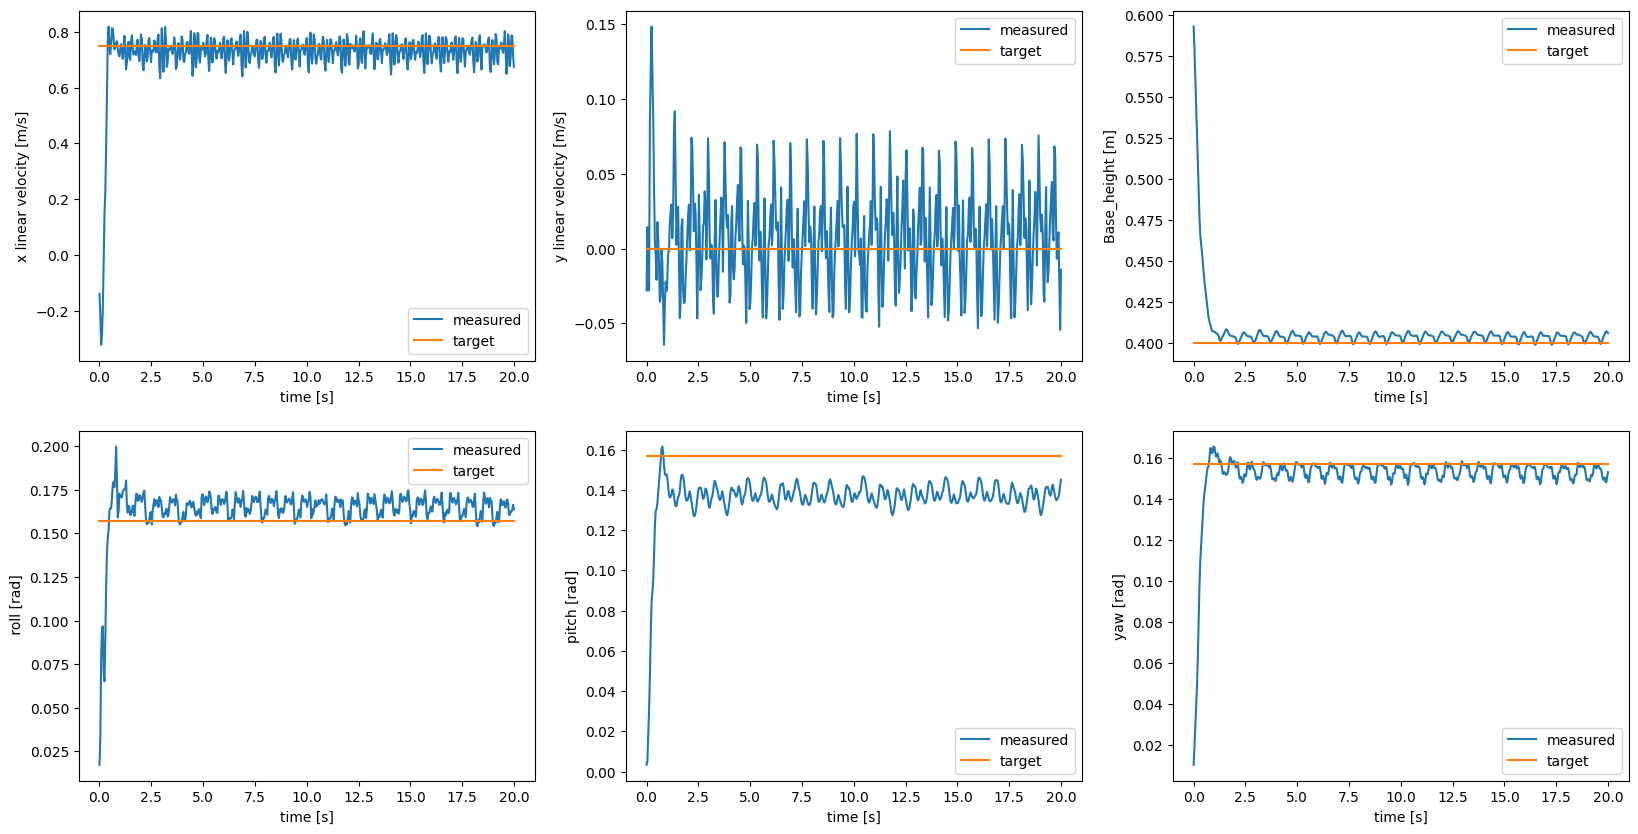

In [ ]:
nb_rows = 2
nb_cols = 3
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(20, 10))

time = np.linspace(0, dt*num_samples, len(log['base_vel_x']))

a = axs[0, 0]
if log['base_vel_x']: a.plot(time, log['base_vel_x'], label='measured')
if log["command_lin_x"]: a.plot(time, log["command_lin_x"], label='target')
a.set(xlabel='time [s]', ylabel='x linear velocity [m/s]', title='')
a.legend()

a = axs[0, 1]
if log['base_vel_y']: a.plot(time, log['base_vel_y'], label='measured')
if log["command_lin_y"]: a.plot(time, log["command_lin_y"], label='target')
a.set(xlabel='time [s]', ylabel='y linear velocity [m/s]', title='')
a.legend()

a = axs[0, 2]
if log['base_pos_x']: a.plot(time, log['base_pos_x'], label='measured')
if log["command_height"]: a.plot(time, log["command_height"], label='target')
a.set(xlabel='time [s]', ylabel='Base_height [m]', title='')
a.legend()

a = axs[1, 0]
if log['base_roll']: a.plot(time, log['base_roll'], label='measured')
if log["command_roll"]: a.plot(time, log["command_roll"], label='target')
a.set(xlabel='time [s]', ylabel=' roll [rad]', title='')
a.legend()

a = axs[1, 1]
if log['base_pitch']: a.plot(time, log['base_pitch'], label='measured')
if log["command_pitch"]: a.plot(time, log["command_pitch"], label='target')
a.set(xlabel='time [s]', ylabel='pitch [rad]', title='')
a.legend()

a = axs[1, 2]
if log['base_yaw']: a.plot(time, log['base_yaw'], label='measured')
if log["command_yaw"]: a.plot(time, log["command_yaw"], label='target')
a.set(xlabel='time [s]', ylabel='yaw [rad]', title='')
a.legend()

plt.show()

### Robot Joint State

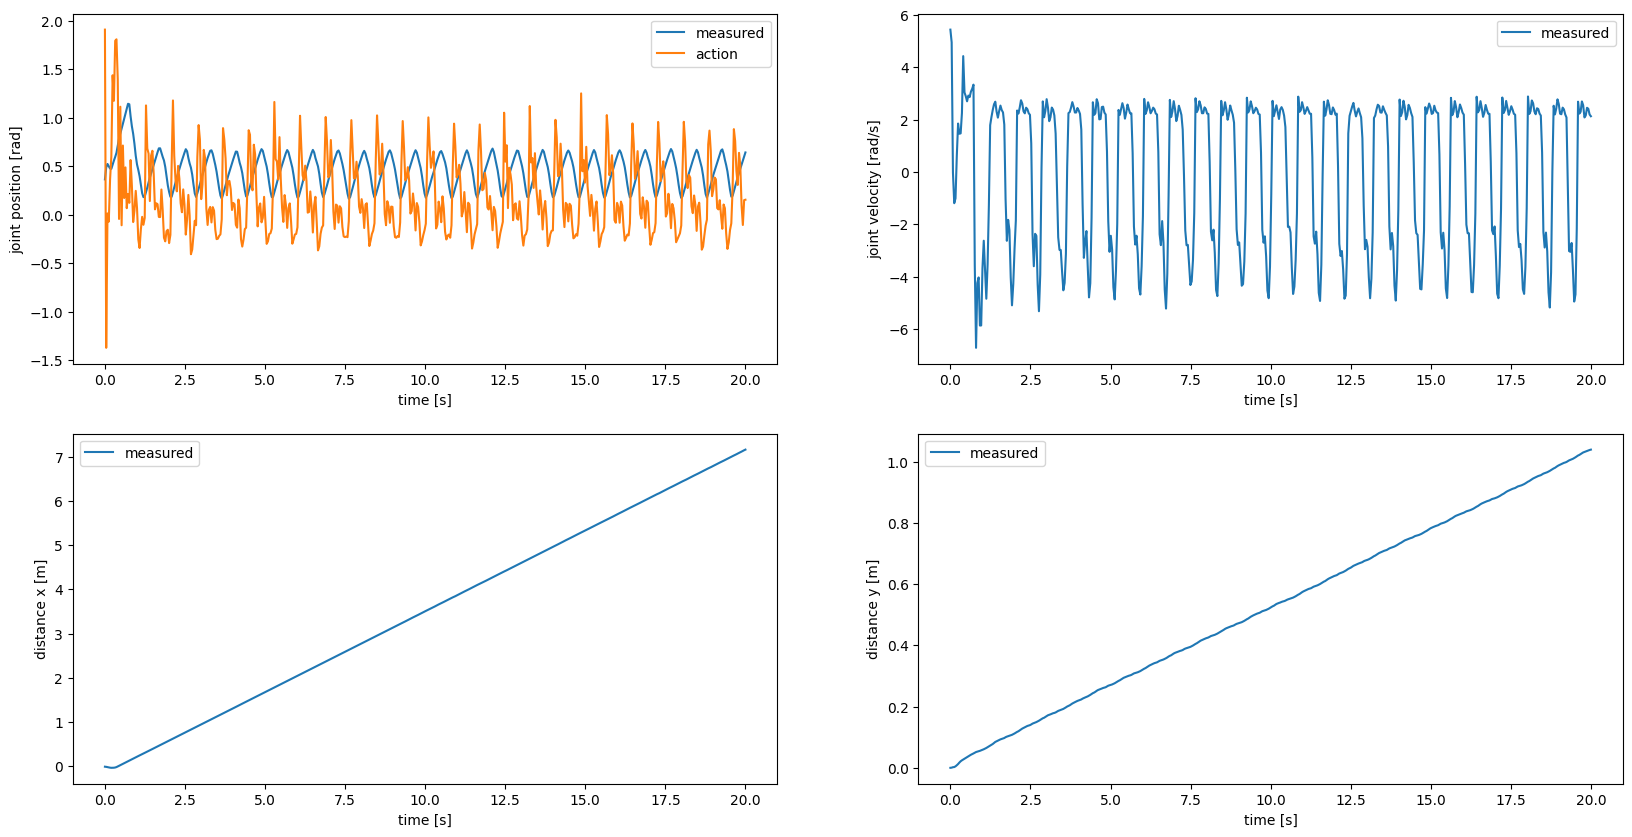

In [ ]:
nb_rows = 2
nb_cols = 2
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(20, 10))

time = np.linspace(0, dt*num_samples, len(log['base_vel_x']))

a = axs[0, 0]
if log['dof_pos']: a.plot(time, log['dof_pos'], label='measured')
if log["dof_pos_target"]: a.plot(time, log["dof_pos_target"], label='action')
a.set(xlabel='time [s]', ylabel='joint position [rad]', title='')
a.legend()

a = axs[0, 1]
if log['dof_vel']: a.plot(time, log['dof_vel'], label='measured')
# if log["command_lin_y"]: a.plot(time, log["command_lin_y"], label='target')
a.set(xlabel='time [s]', ylabel='joint velocity [rad/s]', title='')
a.legend()

a = axs[1, 0]
if log['distance_x']: a.plot(time, log['distance_x'], label='measured')
a.set(xlabel='time [s]', ylabel='distance x [m]', title='')
a.legend()

a = axs[1, 1]
if log['distance_y']: a.plot(time, log['distance_y'], label='measured')
a.set(xlabel='time [s]', ylabel='distance y [m]', title='')
a.legend()

plt.show()

### Gait Analysis

[Text(0, 1.5, 'LF'),
 Text(0, 2.5, 'LH'),
 Text(0, 3.5, 'RF'),
 Text(0, 4.5, 'RH')]

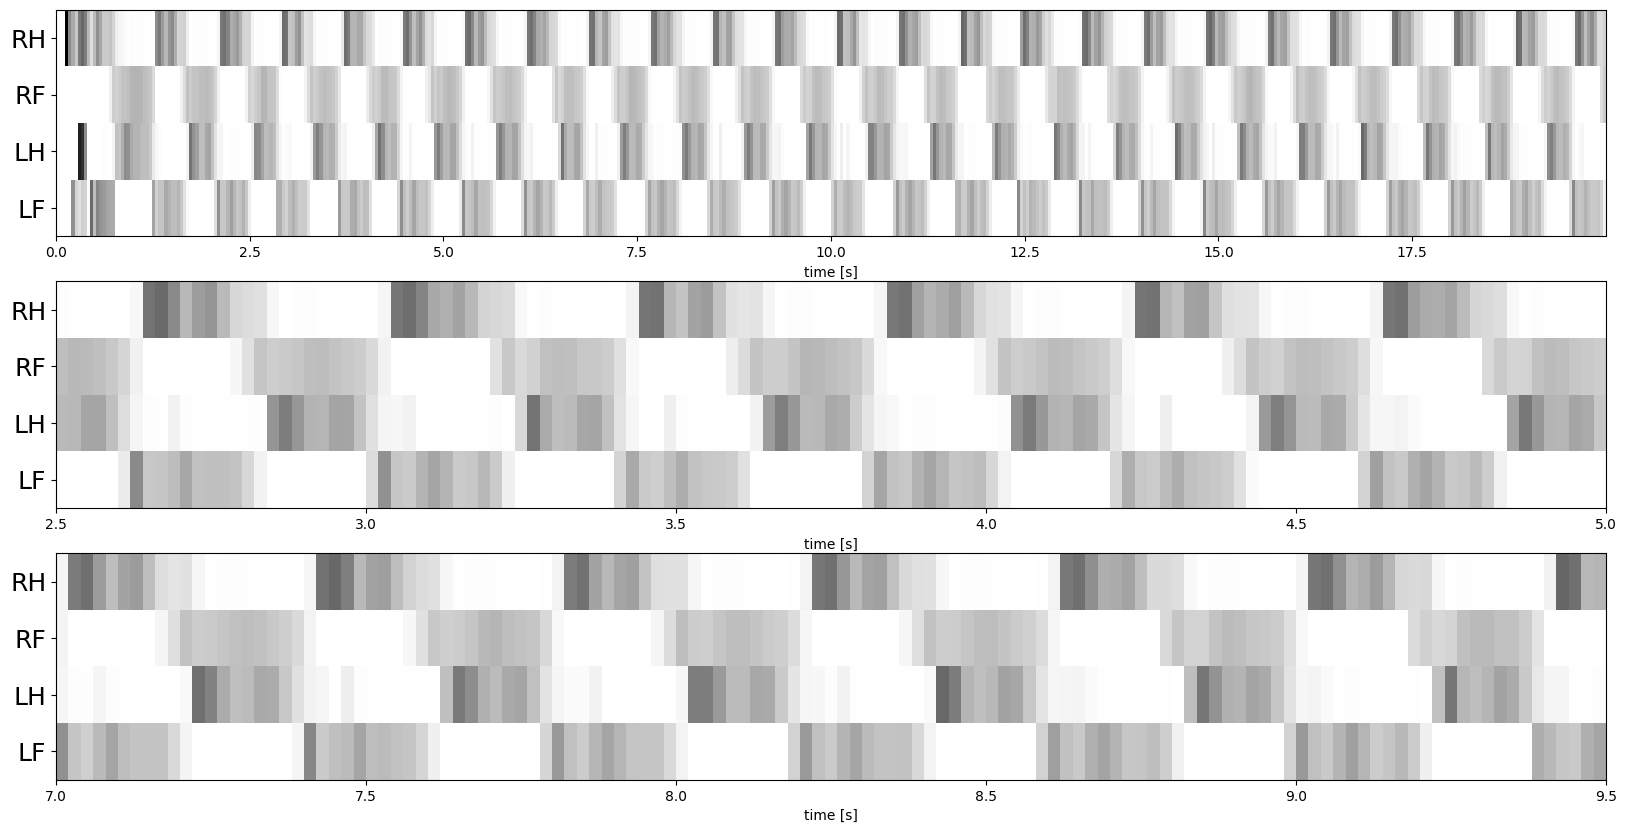

In [ ]:
nb_rows = 3
nb_cols = 1
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(20, 10))

time = np.linspace(0, dt*num_samples, len(log['base_vel_x'])+1)
y, x = np.meshgrid(np.array([1, 2, 3, 4, 5]), time)
z = np.array(log['contact_forces_z'])
z_min, z_max = np.abs(z).min(), np.abs(z).max()
# z = np.where(z < z_max, 0, z_max)

a = axs[0]
c = a.pcolormesh(x, y, z, cmap='Greys', vmin=z_min, vmax=z_max)
a.axis([x.min(), x.max(), y.min(), y.max()])
a.set(xlabel='time [s]')
# Set number of ticks for x-axis
a.set_yticks(np.arange(1.5,5,1))
# Set ticks labels for x-axis
a.set_yticklabels(['LF', 'LH', 'RF', 'RH'], fontsize=18)

# crop
a = axs[1]
start = 2.5
stop = 5
time = np.linspace(start, stop, int((stop-start)/dt)+1)
y, x = np.meshgrid(np.array([1, 2, 3, 4, 5]), time)
z_crop1 = z[int(start/dt):int(stop/dt), :]
c = a.pcolormesh(x, y, z_crop1, cmap='Greys', vmin=z_min, vmax=z_max)
a.axis([x.min(), x.max(), y.min(), y.max()])
a.set(xlabel='time [s]')
# Set number of ticks for x-axis
a.set_yticks(np.arange(1.5,5,1))
# Set ticks labels for x-axis
a.set_yticklabels(['LF', 'LH', 'RF', 'RH'], fontsize=18)

# crop2
a = axs[2]
start = 7
stop = 9.5
time = np.linspace(start, stop, int((stop-start)/dt)+1)
y, x = np.meshgrid(np.array([1, 2, 3, 4, 5]), time)
z_crop2 = z[int(start/dt):int(stop/dt), :]
c = a.pcolormesh(x, y, z_crop2, cmap='Greys', vmin=z_min, vmax=z_max)
a.axis([x.min(), x.max(), y.min(), y.max()])
a.set(xlabel='time [s]')
# Set number of ticks for x-axis
a.set_yticks(np.arange(1.5,5,1))
# Set ticks labels for x-axis
a.set_yticklabels(['LF', 'LH', 'RF', 'RH'], fontsize=18)

# LF[0] LH[1] RF[2] RH[3]

## EXPERIMENT 1

### Reward Compare

### Tracking Compare